# Forest Cover Type

https://www.kaggle.com/c/forest-cover-type-kernels-only

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1 - Spruce/Fir
2 - Lodgepole Pine
3 - Ponderosa Pine
4 - Cottonwood/Willow
5 - Aspen
6 - Douglas-fir
7 - Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

#### Data Fields
- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

#### The wilderness areas are:

1 - Rawah Wilderness Area
2 - Neota Wilderness Area
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area

#### The soil types are:

1 Cathedral family - Rock outcrop complex, extremely stony.
2 Vanet - Ratake families complex, very stony.
3 Haploborolis - Rock outcrop complex, rubbly.
4 Ratake family - Rock outcrop complex, rubbly.
5 Vanet family - Rock outcrop complex complex, rubbly.
6 Vanet - Wetmore families - Rock outcrop complex, stony.
7 Gothic family.
8 Supervisor - Limber families complex.
9 Troutville family, very stony.
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
11 Bullwark - Catamount families - Rock land complex, rubbly.
12 Legault family - Rock land complex, stony.
13 Catamount family - Rock land - Bullwark family complex, rubbly.
14 Pachic Argiborolis - Aquolis complex.
15 unspecified in the USFS Soil and ELU Survey.
16 Cryaquolis - Cryoborolis complex.
17 Gateview family - Cryaquolis complex.
18 Rogert family, very stony.
19 Typic Cryaquolis - Borohemists complex.
20 Typic Cryaquepts - Typic Cryaquolls complex.
21 Typic Cryaquolls - Leighcan family, till substratum complex.
22 Leighcan family, till substratum, extremely bouldery.
23 Leighcan family, till substratum - Typic Cryaquolls complex.
24 Leighcan family, extremely stony.
25 Leighcan family, warm, extremely stony.
26 Granile - Catamount families complex, very stony.
27 Leighcan family, warm - Rock outcrop complex, extremely stony.
28 Leighcan family - Rock outcrop complex, extremely stony.
29 Como - Legault families complex, extremely stony.
30 Como family - Rock land - Legault family complex, extremely stony.
31 Leighcan - Catamount families complex, extremely stony.
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34 Cryorthents - Rock land complex, extremely stony.
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
40 Moran family - Cryorthents - Rock land complex, extremely stony.

# Import Libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Analysis
### Data Understanding

In [142]:
forest_df = pd.read_csv('train.csv')
forest_df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
Elevation,2596,2590,2804,2785,2595
Aspect,51,56,139,155,45
Slope,3,2,9,18,2
Horizontal_Distance_To_Hydrology,258,212,268,242,153
Vertical_Distance_To_Hydrology,0,-6,65,118,-1
Horizontal_Distance_To_Roadways,510,390,3180,3090,391
Hillshade_9am,221,220,234,238,220
Hillshade_Noon,232,235,238,238,234
Hillshade_3pm,148,151,135,122,150


#### Observations
##### Variable Types
- Elevation - Continuous
- Aspect  - Continuous
- Slope - Continuous
- Horizontal_Distance_To_Hydrology - Continuous
- Vertical_Distance_To_Hydrology - Continuous
- Horizontal_Distance_To_Roadways	 - Continuous
- Hillshade_9am	 - Continuous
- Hillshade_Noon	 - Continuous
- Hillshade_3pm	 - Continuous
- Horizontal_Distance_To_Fire_Points	 - Continuous
- Wilderness_Area1 - Wilderness_Area4 - Binary
- Soil_Type1 - Soil_Type40 - Binary
- Cover_Type - Nominal (Target Variable)

In [143]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

#### Observations
- Total rows in the dataset is 15120
- Total columns in the dataset is 56
- No null values found in the dataset 

In [144]:
forest_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0


#### Observations
- Vertical_Distance_To_Hydrology column has negative values.
- Check for outliers for the following columns
    - Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Horizontal_Distance_To_Fire_Points

### Data Visualization

###### Cover_Type (Target Variable)

In [145]:
print(forest_df['Cover_Type'].value_counts())

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64


###### Elevation

Text(0.5,1,'Elevation for Cover_Types')

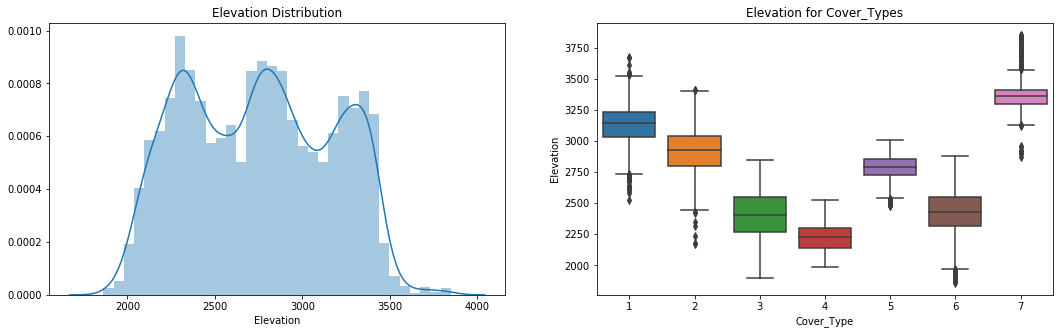

In [146]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(forest_df['Elevation'])
plt.title('Elevation Distribution')

plt.subplot(1,2,2)
sns.boxplot(x = 'Cover_Type', y = 'Elevation', data = forest_df )
plt.title('Elevation for Cover_Types')

###### Aspect

Text(0.5,1,'Aspect for Cover_Types')

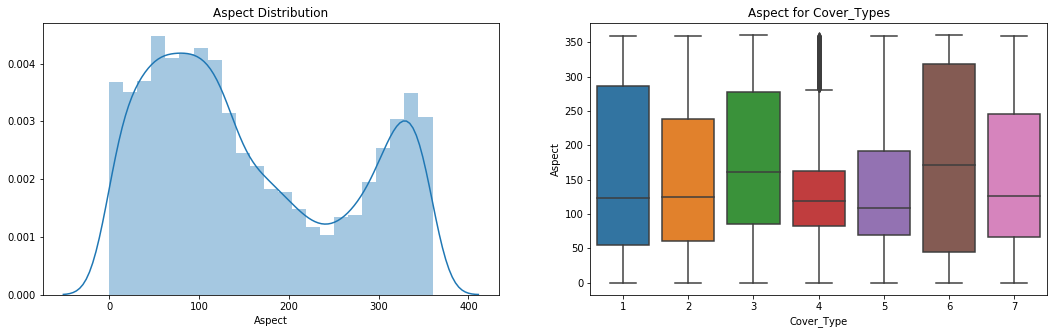

In [147]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(forest_df['Aspect'])
plt.title('Aspect Distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Cover_Type', y='Aspect', data = forest_df)
plt.title('Aspect for Cover_Types')

###### Slope

Text(0.5,1,'Slope for Cover_Types')

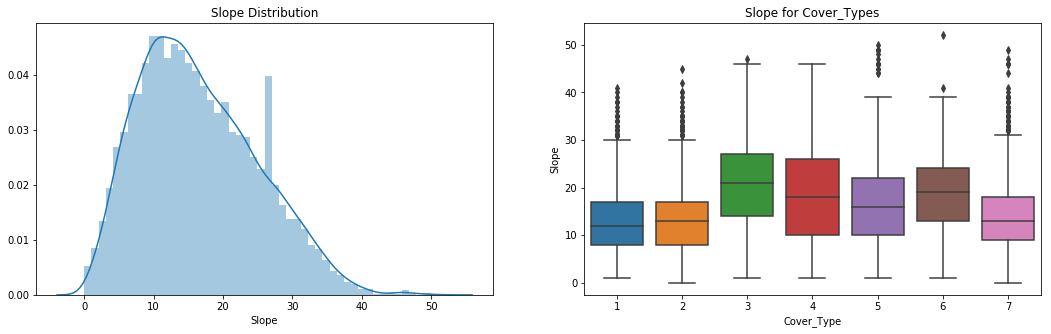

In [148]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(forest_df['Slope'])
plt.title('Slope Distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Cover_Type', y='Slope', data = forest_df)
plt.title('Slope for Cover_Types')

###### Observation
- Slope between 25 to 30 has some abnormal spike. So plotting for that range
- Looks like Cover_Type 6 for Slope > 50 has got some outliers

Text(0.5,1,'Slope Distribution for Cover_Types')

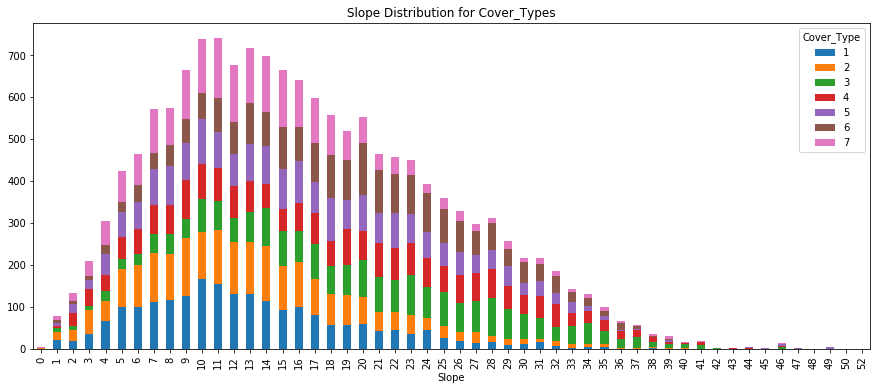

In [149]:
#plt.figure(figsize=(18,5))
#sns.countplot(x='Slope', hue='Cover_Type', data = forest_df.query( 'Slope >= 25 and Slope <= 30' ) ) 
#plt.legend(loc='best')
pd.crosstab(forest_df['Slope'], forest_df['Cover_Type']).plot(kind='bar', stacked=True, figsize=(15,6))
plt.title('Slope Distribution for Cover_Types')

###### Horizontal_Distance_To_Hydrology

Text(0.5,1,'Horizontal_Distance_To_Hydrology for Cover_Types')

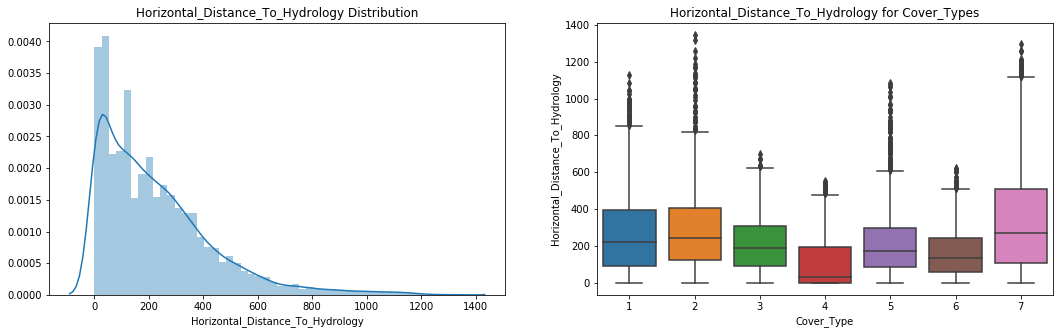

In [150]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(forest_df['Horizontal_Distance_To_Hydrology'])
plt.title('Horizontal_Distance_To_Hydrology Distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Hydrology', data = forest_df)
plt.title('Horizontal_Distance_To_Hydrology for Cover_Types')

###### Vertical_Distance_To_Hydrology

Text(0.5,1,'Vertical_Distance_To_Hydrology for Cover_Types')

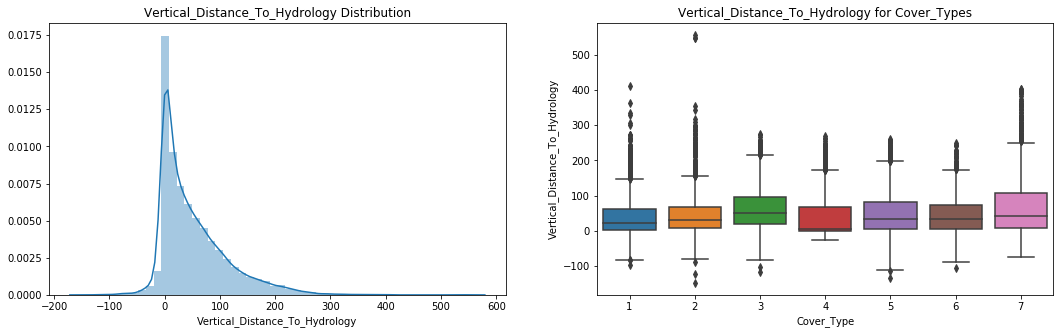

In [151]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(forest_df['Vertical_Distance_To_Hydrology'])
plt.title('Vertical_Distance_To_Hydrology Distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Cover_Type', y='Vertical_Distance_To_Hydrology', data = forest_df)
plt.title('Vertical_Distance_To_Hydrology for Cover_Types')

###### Observation
- found few negative observations for Vertical_Distance_To_Hydrology
- Cover_Type 2 has got an outlier at Vertical_Distance_To_Hydrology > 450

###### Horizontal_Distance_To_Roadways

Text(0.5,1,'Horizontal_Distance_To_Roadways for Cover_Types')

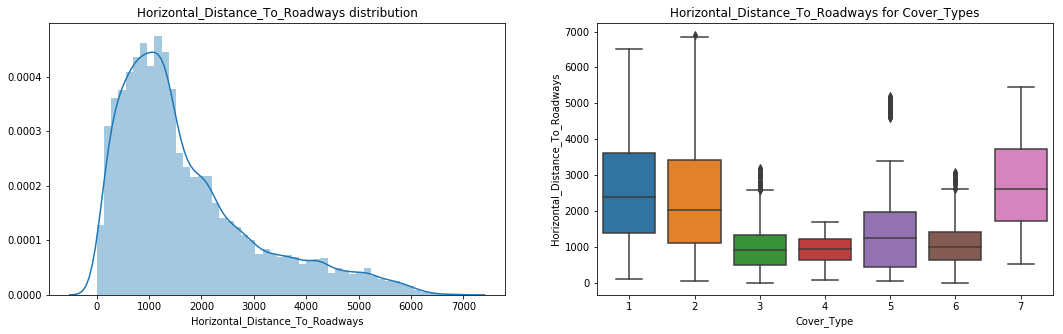

In [152]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(forest_df['Horizontal_Distance_To_Roadways'])
plt.title('Horizontal_Distance_To_Roadways distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Roadways', data = forest_df)
plt.title('Horizontal_Distance_To_Roadways for Cover_Types')

###### Hillshade_9am, Hillshade_Noon, Hillshade_3pm

Text(0.5,1,'HillShades for Cover_Type')

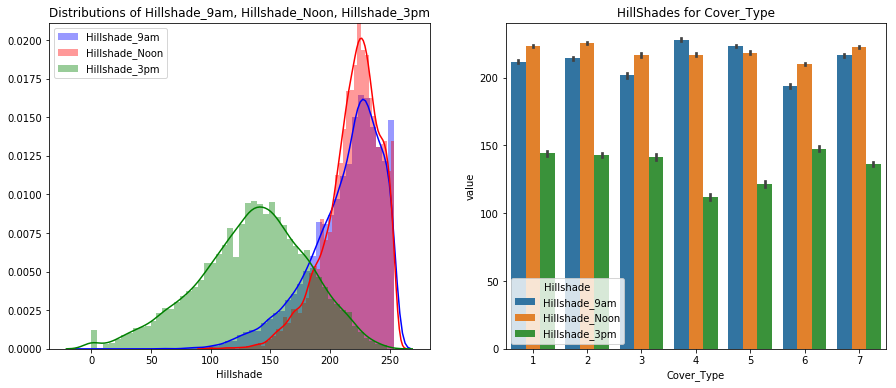

In [153]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
ax = sns.distplot(forest_df['Hillshade_9am'], color='b', label='Hillshade_9am')
ax = sns.distplot(forest_df['Hillshade_Noon'], color='r', label='Hillshade_Noon')
ax = sns.distplot(forest_df['Hillshade_3pm'], color='g', label='Hillshade_3pm')
ax.legend()
plt.xlabel('Hillshade')
plt.title('Distributions of Hillshade_9am, Hillshade_Noon, Hillshade_3pm')


plt.subplot(1,2,2)
hillshade_df = forest_df.loc[ : , ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Cover_Type'] ]
hillshade_df = pd.melt(hillshade_df, 'Cover_Type', var_name='Hillshade')
sns.barplot(x='Cover_Type', y='value', hue='Hillshade', data=hillshade_df)
plt.title('HillShades for Cover_Type')

Text(0.5,1,'Hillshade_3pm for Cover_Types')

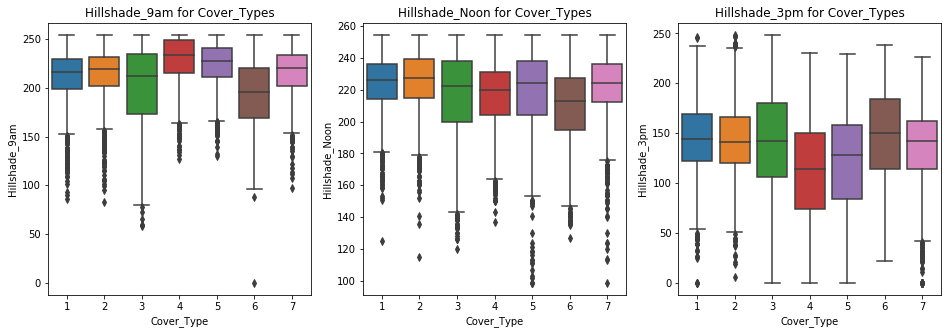

In [154]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.boxplot(x='Cover_Type', y='Hillshade_9am', data=forest_df)
plt.title('Hillshade_9am for Cover_Types')

plt.subplot(1,3,2)
sns.boxplot(x='Cover_Type', y='Hillshade_Noon', data=forest_df)
plt.title('Hillshade_Noon for Cover_Types')

plt.subplot(1,3,3)
sns.boxplot(x='Cover_Type', y='Hillshade_3pm', data=forest_df)
plt.title('Hillshade_3pm for Cover_Types')

- Looks like Hillshade_9am < 50 for Cover_Type 6 has got some outliers

###### Horizontal_Distance_To_Fire_Points

Text(0.5,1,'Horizontal_Distance_To_Fire_Points for Cover_Types')

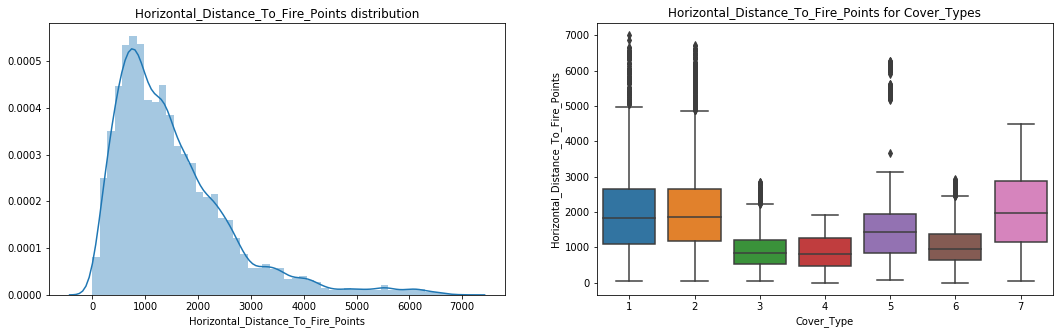

In [155]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(forest_df['Horizontal_Distance_To_Fire_Points'])
plt.title('Horizontal_Distance_To_Fire_Points distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Fire_Points', data = forest_df)
plt.title('Horizontal_Distance_To_Fire_Points for Cover_Types')

###### Wilderness_Area 1 to 4

Text(0.5,1,'Wilderness_Area for Cover_Types')

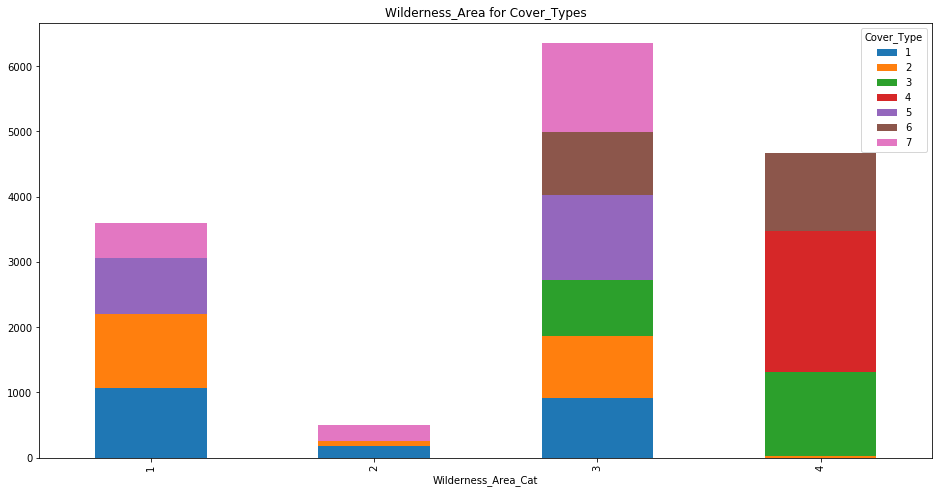

In [156]:
Wilderness_Area_df = forest_df.loc[ : , ['Wilderness_Area1', 'Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']]
Wilderness_Area_df['Wilderness_Area_Cat'] = Wilderness_Area_df.idxmax(axis=1)
Wilderness_Area_df['Wilderness_Area_Cat'] = Wilderness_Area_df['Wilderness_Area_Cat'].apply(lambda x : x.replace('Wilderness_Area',''))

Wilderness_Area_df = pd.concat([Wilderness_Area_df['Wilderness_Area_Cat'], forest_df['Cover_Type']], axis=1)

pd.crosstab(Wilderness_Area_df['Wilderness_Area_Cat'], Wilderness_Area_df['Cover_Type']).plot(kind='bar', stacked=True, figsize=(16,8))
#sns.countplot(x='Wilderness_Area_Cat', hue='Cover_Type', data=Wilderness_Area_df)
plt.title('Wilderness_Area for Cover_Types')

###### Observation
- Cover_Type 1 & 7 is observed for Wilderness_Area types 1, 2 & 3
- Cover_type 2 is almost spread across all Wilderness_Area types
- Cover_type 3 & 6 is observed for Wilderness_Area types 3 & 4
- Cover_type 4 is observed for Wilderness_Area type 4
- Cover_type 5 is observed for Wilderness_Area types 1 & 3

###### Soil_Type 1 to 40

Text(0.5,1,'Soil_Type for Cover_Types')

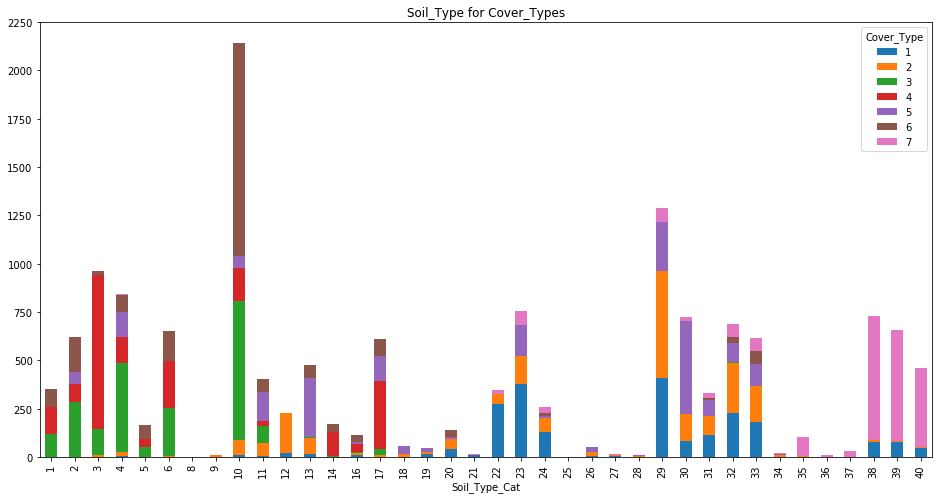

In [157]:
Soil_Type_df = forest_df.loc[ : , ['Soil_Type1', 'Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5', 'Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10',
                                   'Soil_Type11', 'Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15', 'Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20',
                                   'Soil_Type21', 'Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25', 'Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30',
                                   'Soil_Type31', 'Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35', 'Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40']]
Soil_Type_df['Soil_Type_Cat'] = Soil_Type_df.idxmax(axis=1)
Soil_Type_df['Soil_Type_Cat'] = Soil_Type_df['Soil_Type_Cat'].apply(lambda x : x.replace('Soil_Type',''))

Soil_Type_df = pd.concat([Soil_Type_df['Soil_Type_Cat'], forest_df['Cover_Type']], axis=1)
Soil_Type_df['Soil_Type_Cat'] = pd.to_numeric(Soil_Type_df['Soil_Type_Cat'])
Soil_Type_df = Soil_Type_df.sort_values('Soil_Type_Cat')

pd.crosstab(Soil_Type_df['Soil_Type_Cat'], Soil_Type_df['Cover_Type']).plot(kind='bar', stacked=True, figsize=(16,8))
plt.title('Soil_Type for Cover_Types')

###### Observation
- Soil_Type of 7 and 15 has no observations

- Cover_Type 1 is observed for Soil_Type greater than 10
- Cover_Type 2 is almost spread across all Soil_Types but observed more between the range of 10 - 35
- Cover_Type 3 is observed for Soil_Type < 11
- Cover_Type 4 is observed for Soil_Type < 17
- Cover_Type 5 is observed for Soil_Type < 33
- Cover_Type 6 is observed for Soil_Type < 20
- Cover_Type 7 is observed for Soil_Type > 20

## Binning the Numerical Features

#### Binning the Elevation column

In [158]:
bins = [-1, 1900, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000]
labels = ['<1900', '1900-2000', '2000-2200', '2200-2400', '2400-2600', '2600-2800', '2800-3000', '3000-3200', '3200-3400', '3400-3600', '3600-3800', '>3800']
forest_df['Elevation_Cat'] = pd.cut(forest_df['Elevation'], bins=bins, labels=labels)

forest_df['Elevation_Cat'] = forest_df['Elevation_Cat'].astype('object')

#### Binning the Aspect column

In [159]:
bins = [-1, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400]
labels = ['<25', '25-50', '50-75', '75-100', '100-125', '125-150', '150-175', '175-200', '200-225', '225-250', '250-275', '275-300', '300-325', '325-350', '350-375', '>375']
forest_df['Aspect_Cat'] = pd.cut(forest_df['Aspect'], bins=bins, labels=labels)

forest_df['Aspect_Cat'] = forest_df['Aspect_Cat'].astype('object')

#### Binning the Slope column

In [160]:
bins = [-1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
labels = ['<5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '>55']
forest_df['Slope_Cat'] = pd.cut(forest_df['Slope'], bins=bins, labels=labels)

forest_df['Slope_Cat'] = forest_df['Slope_Cat'].astype('object')

#### Binning the Horizontal_Distance_To_Hydrology column

In [161]:
bins = [-1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]
labels = ['<100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000-1100', '1100-1200', '1200-1300', '>1300']
forest_df['Horizontal_Distance_To_Hydrology_Cat'] = pd.cut(forest_df['Horizontal_Distance_To_Hydrology'], bins=bins, labels=labels)

forest_df['Horizontal_Distance_To_Hydrology_Cat'] = forest_df['Horizontal_Distance_To_Hydrology_Cat'].astype('object')

#### Binning the Vertical_Distance_To_Hydrology column

In [162]:
bins = [-200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
labels = ['<-150', '-150--100', '-100--50', '-50-0', '0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500-550', '>600']
forest_df['Vertical_Distance_To_Hydrology_Cat'] = pd.cut(forest_df['Vertical_Distance_To_Hydrology'], bins=bins, labels=labels)

forest_df['Vertical_Distance_To_Hydrology_Cat'] = forest_df['Vertical_Distance_To_Hydrology_Cat'].astype('object')

#### Binning the Horizontal_Distance_To_Roadways column

In [163]:
bins = [-1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000]
labels = ['<500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500', '4500-5000', '5000-5500', '5500-6000', '6000-6500', '>6500']
forest_df['Horizontal_Distance_To_Roadways_Cat'] = pd.cut(forest_df['Horizontal_Distance_To_Roadways'], bins=bins, labels=labels)

forest_df['Horizontal_Distance_To_Roadways_Cat'] = forest_df['Horizontal_Distance_To_Roadways_Cat'].astype('object')

#### Binning the Hillshade_9am, Hillshade_Noon, Hillshade_3pm column

In [164]:
bins = [-1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]
labels = ['<20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-140', '140-160', '160-180', '180-200', '200-220', '220-240', '240-260', '260-280', '>280']
forest_df['Hillshade_9am_Cat'] = pd.cut(forest_df['Hillshade_9am'], bins=bins, labels=labels)
forest_df['Hillshade_9am_Cat'] = forest_df['Hillshade_9am_Cat'].astype('object')

forest_df['Hillshade_Noon_Cat'] = pd.cut(forest_df['Hillshade_Noon'], bins=bins, labels=labels)
forest_df['Hillshade_Noon_Cat'] = forest_df['Hillshade_Noon_Cat'].astype('object')

forest_df['Hillshade_3pm_Cat'] = pd.cut(forest_df['Hillshade_3pm'], bins=bins, labels=labels)
forest_df['Hillshade_3pm_Cat'] = forest_df['Hillshade_3pm_Cat'].astype('object')

#### Binning the Horizontal_Distance_To_Fire_Points column

In [165]:
bins = [-1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000]
labels = ['<500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500', '4500-5000', '5000-5500', '5500-6000', '6000-6500', '>6500']
forest_df['Horizontal_Distance_To_Fire_Points_Cat'] = pd.cut(forest_df['Horizontal_Distance_To_Fire_Points'], bins=bins, labels=labels)

forest_df['Horizontal_Distance_To_Fire_Points_Cat'] = forest_df['Horizontal_Distance_To_Fire_Points_Cat'].astype('object')

# Data Cleaning

### Check for Outliers

###### Slope > 50 for CoverType 6

In [166]:
forest_df.query('Slope > 50 & Cover_Type == 6')

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Elevation_Cat,Aspect_Cat,Slope_Cat,Horizontal_Distance_To_Hydrology_Cat,Vertical_Distance_To_Hydrology_Cat,Horizontal_Distance_To_Roadways_Cat,Hillshade_9am_Cat,Hillshade_Noon_Cat,Hillshade_3pm_Cat,Horizontal_Distance_To_Fire_Points_Cat
2241,2242,2618,301,52,124,59,1789,0,157,231,...,2600-2800,300-325,50-55,100-200,50-100,1500-2000,<20,140-160,220-240,1000-1500


###### Hillshade_9am < 50 for Cover_Type 6

In [167]:
forest_df.query('Hillshade_9am < 50 & Cover_Type == 6')

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Elevation_Cat,Aspect_Cat,Slope_Cat,Horizontal_Distance_To_Hydrology_Cat,Vertical_Distance_To_Hydrology_Cat,Horizontal_Distance_To_Roadways_Cat,Hillshade_9am_Cat,Hillshade_Noon_Cat,Hillshade_3pm_Cat,Horizontal_Distance_To_Fire_Points_Cat
2241,2242,2618,301,52,124,59,1789,0,157,231,...,2600-2800,300-325,50-55,100-200,50-100,1500-2000,<20,140-160,220-240,1000-1500


###### Vertical_Distance_To_Hydrology > 450 for Cover_Type 2

In [168]:
forest_df.query('Vertical_Distance_To_Hydrology > 450 & Cover_Type == 2')

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Elevation_Cat,Aspect_Cat,Slope_Cat,Horizontal_Distance_To_Hydrology_Cat,Vertical_Distance_To_Hydrology_Cat,Horizontal_Distance_To_Roadways_Cat,Hillshade_9am_Cat,Hillshade_Noon_Cat,Hillshade_3pm_Cat,Horizontal_Distance_To_Fire_Points_Cat
1803,1804,2931,283,26,778,554,854,138,230,227,...,2800-3000,275-300,25-30,700-800,>600,500-1000,120-140,220-240,220-240,2500-3000
1892,1893,2922,272,31,799,547,875,123,231,238,...,2800-3000,250-275,30-35,700-800,500-550,500-1000,120-140,220-240,220-240,2000-2500
11938,11939,2924,272,32,816,547,886,122,231,238,...,2800-3000,250-275,30-35,800-900,500-550,500-1000,120-140,220-240,220-240,2500-3000


###### Hillshade_Noon < 130 and Cover_Type == 1 or Cover_Type == 2

In [169]:
forest_df.query('Hillshade_Noon < 130 & ( Cover_Type == 1 | Cover_Type == 2 )')

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Elevation_Cat,Aspect_Cat,Slope_Cat,Horizontal_Distance_To_Hydrology_Cat,Vertical_Distance_To_Hydrology_Cat,Horizontal_Distance_To_Roadways_Cat,Hillshade_9am_Cat,Hillshade_Noon_Cat,Hillshade_3pm_Cat,Horizontal_Distance_To_Fire_Points_Cat
1517,1518,3244,54,40,255,146,4039,209,125,0,...,3200-3400,50-75,35-40,200-300,100-150,4000-4500,200-220,120-140,<20,1000-1500
9903,9904,3101,4,45,240,25,1172,123,115,98,...,3000-3200,<25,40-45,200-300,0-50,1000-1500,120-140,100-120,80-100,1500-2000


###### Hillshade_Noon < 100 and Cover_Type == 7

In [170]:
forest_df.query('Hillshade_Noon < 100 & ( Cover_Type == 7 )')

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Elevation_Cat,Aspect_Cat,Slope_Cat,Horizontal_Distance_To_Hydrology_Cat,Vertical_Distance_To_Hydrology_Cat,Horizontal_Distance_To_Roadways_Cat,Hillshade_9am_Cat,Hillshade_Noon_Cat,Hillshade_3pm_Cat,Horizontal_Distance_To_Fire_Points_Cat
8193,8194,3393,73,49,306,153,2305,218,99,0,...,3200-3400,50-75,45-50,300-400,150-200,2000-2500,200-220,80-100,<20,500-1000


###### Hillshade_3pm <= 10 for Cover_Type 1,2,3,5,7

In [171]:
forest_df.query('Hillshade_3pm <= 10 & ( Cover_Type == 1 | Cover_Type == 2 | Cover_Type == 3 | Cover_Type == 5 | Cover_Type == 7)')

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Elevation_Cat,Aspect_Cat,Slope_Cat,Horizontal_Distance_To_Hydrology_Cat,Vertical_Distance_To_Hydrology_Cat,Horizontal_Distance_To_Roadways_Cat,Hillshade_9am_Cat,Hillshade_Noon_Cat,Hillshade_3pm_Cat,Horizontal_Distance_To_Fire_Points_Cat
1375,1376,2806,76,39,234,119,255,235,141,0,...,2800-3000,75-100,35-40,200-300,100-150,<500,220-240,140-160,<20,1000-1500
1411,1412,2773,80,48,124,112,134,226,107,0,...,2600-2800,75-100,45-50,100-200,100-150,<500,220-240,100-120,<20,1000-1500
1416,1417,2779,78,47,134,118,150,227,111,0,...,2600-2800,75-100,45-50,100-200,100-150,<500,220-240,100-120,<20,1000-1500
1419,1420,2786,76,46,150,132,162,226,113,0,...,2600-2800,75-100,45-50,100-200,100-150,<500,220-240,100-120,<20,1000-1500
1423,1424,2743,76,49,134,81,150,222,103,0,...,2600-2800,75-100,45-50,100-200,50-100,<500,220-240,100-120,<20,1000-1500
1424,1425,2728,62,29,108,72,124,230,166,0,...,2600-2800,50-75,25-30,100-200,50-100,<500,220-240,160-180,<20,1000-1500
1427,1428,2803,74,46,175,141,190,224,111,0,...,2800-3000,50-75,45-50,100-200,100-150,<500,220-240,100-120,<20,1000-1500
1431,1432,2760,75,49,170,95,175,219,99,0,...,2600-2800,50-75,45-50,100-200,50-100,<500,200-220,80-100,<20,1000-1500
1439,1440,2828,72,45,228,163,234,223,113,0,...,2800-3000,50-75,40-45,200-300,150-200,<500,220-240,100-120,<20,1000-1500
1440,1441,2710,66,32,90,53,95,232,160,0,...,2600-2800,50-75,30-35,<100,50-100,<500,220-240,140-160,<20,1000-1500


### Remove Outliers

In [172]:
master_df = forest_df.loc[~(
                            ((forest_df['Slope'] > 50) & (forest_df['Cover_Type'] == 6)) | 
                            ((forest_df['Vertical_Distance_To_Hydrology'] > 450)  & (forest_df['Cover_Type'] == 2)) |
                            ((forest_df['Hillshade_9am'] < 50) & (forest_df['Cover_Type'] == 6)) |
                            ((forest_df['Hillshade_Noon'] < 130) & (forest_df['Cover_Type'] == 1)) |
                            ((forest_df['Hillshade_Noon'] < 130) & (forest_df['Cover_Type'] == 2)) |
                            ((forest_df['Hillshade_Noon'] < 100) & ( forest_df['Cover_Type'] == 7 )) |
                            ((forest_df['Hillshade_3pm'] < 10) & 
                                 (( forest_df['Cover_Type'] == 1 ) | 
                                  ( forest_df['Cover_Type'] == 2 ) | 
                                  ( forest_df['Cover_Type'] == 3 ) | 
                                  ( forest_df['Cover_Type'] == 5 ) | 
                                  ( forest_df['Cover_Type'] == 7 )) 
                            )
                           )
                         ]

master_df = master_df.loc[:, ['Id','Elevation_Cat','Aspect_Cat','Slope_Cat','Horizontal_Distance_To_Hydrology_Cat',
                              'Vertical_Distance_To_Hydrology_Cat','Horizontal_Distance_To_Roadways_Cat',
                              'Hillshade_9am_Cat','Hillshade_Noon_Cat','Hillshade_3pm_Cat',
                              'Horizontal_Distance_To_Fire_Points_Cat',
                                'Wilderness_Area1', 'Wilderness_Area2','Wilderness_Area3','Wilderness_Area4',
                                'Soil_Type1', 'Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5', 'Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10',
                                'Soil_Type11', 'Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15', 'Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20',
                                'Soil_Type21', 'Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25', 'Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30',
                                'Soil_Type31', 'Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35', 'Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40',
                                'Cover_Type']]

# Prepare the Test Data

Preparing the test data before creating dummies for Train data because some of the categories available in Test data after binning is not available in the Train data.  

In [173]:
forest_test = pd.read_csv('test.csv')
forest_test.head().T

,0,1,2,3,4
Id,15121,15122,15123,15124,15125
Elevation,2680,2683,2713,2709,2706
Aspect,354,0,16,24,29
Slope,14,13,15,17,19
Horizontal_Distance_To_Hydrology,0,0,0,0,0
Vertical_Distance_To_Hydrology,0,0,0,0,0
Horizontal_Distance_To_Roadways,2684,2654,2980,2950,2920
Hillshade_9am,196,201,206,208,210
Hillshade_Noon,214,216,208,201,195
Hillshade_3pm,156,152,137,125,115


#### Binning the features

In [174]:
bins = [-1, 1900, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000]
labels = ['<1900', '1900-2000', '2000-2200', '2200-2400', '2400-2600', '2600-2800', '2800-3000', '3000-3200', '3200-3400', '3400-3600', '3600-3800', '>3800']
forest_test['Elevation_Cat'] = pd.cut(forest_test['Elevation'], bins=bins, labels=labels)
forest_test['Elevation_Cat'] = forest_test['Elevation_Cat'].astype('object')

bins = [-1, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400]
labels = ['<25', '25-50', '50-75', '75-100', '100-125', '125-150', '150-175', '175-200', '200-225', '225-250', '250-275', '275-300', '300-325', '325-350', '350-375', '>375']
forest_test['Aspect_Cat'] = pd.cut(forest_test['Aspect'], bins=bins, labels=labels)
forest_test['Aspect_Cat'] = forest_test['Aspect_Cat'].astype('object')

bins = [-1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
labels = ['<5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '>55']
forest_test['Slope_Cat'] = pd.cut(forest_test['Slope'], bins=bins, labels=labels)
forest_test['Slope_Cat'] = forest_test['Slope_Cat'].astype('object')

bins = [-1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]
labels = ['<100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000-1100', '1100-1200', '1200-1300', '>1300']
forest_test['Horizontal_Distance_To_Hydrology_Cat'] = pd.cut(forest_test['Horizontal_Distance_To_Hydrology'], bins=bins, labels=labels)
forest_test['Horizontal_Distance_To_Hydrology_Cat'] = forest_test['Horizontal_Distance_To_Hydrology_Cat'].astype('object')

bins = [-200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
labels = ['<-150', '-150--100', '-100--50', '-50-0', '0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500-550', '>600']
forest_test['Vertical_Distance_To_Hydrology_Cat'] = pd.cut(forest_test['Vertical_Distance_To_Hydrology'], bins=bins, labels=labels)
forest_test['Vertical_Distance_To_Hydrology_Cat'] = forest_test['Vertical_Distance_To_Hydrology_Cat'].astype('object')

bins = [-1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000]
labels = ['<500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500', '4500-5000', '5000-5500', '5500-6000', '6000-6500', '>6500']
forest_test['Horizontal_Distance_To_Roadways_Cat'] = pd.cut(forest_test['Horizontal_Distance_To_Roadways'], bins=bins, labels=labels)
forest_test['Horizontal_Distance_To_Roadways_Cat'] = forest_test['Horizontal_Distance_To_Roadways_Cat'].astype('object')

bins = [-1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]
labels = ['<20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-140', '140-160', '160-180', '180-200', '200-220', '220-240', '240-260', '260-280', '>280']
forest_test['Hillshade_9am_Cat'] = pd.cut(forest_test['Hillshade_9am'], bins=bins, labels=labels)
forest_test['Hillshade_9am_Cat'] = forest_test['Hillshade_9am_Cat'].astype('object')

forest_test['Hillshade_Noon_Cat'] = pd.cut(forest_test['Hillshade_Noon'], bins=bins, labels=labels)
forest_test['Hillshade_Noon_Cat'] = forest_test['Hillshade_Noon_Cat'].astype('object')

forest_test['Hillshade_3pm_Cat'] = pd.cut(forest_test['Hillshade_3pm'], bins=bins, labels=labels)
forest_test['Hillshade_3pm_Cat'] = forest_test['Hillshade_3pm_Cat'].astype('object')

bins = [-1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000]
labels = ['<500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500', '4500-5000', '5000-5500', '5500-6000', '6000-6500', '>6500']
forest_test['Horizontal_Distance_To_Fire_Points_Cat'] = pd.cut(forest_test['Horizontal_Distance_To_Fire_Points'], bins=bins, labels=labels)
forest_test['Horizontal_Distance_To_Fire_Points_Cat'] = forest_test['Horizontal_Distance_To_Fire_Points_Cat'].astype('object')


#### Frame the master test data frame 

In [175]:
master_test_df = forest_test.loc[:, ['Id','Elevation_Cat','Aspect_Cat','Slope_Cat','Horizontal_Distance_To_Hydrology_Cat',
                              'Vertical_Distance_To_Hydrology_Cat','Horizontal_Distance_To_Roadways_Cat',
                              'Hillshade_9am_Cat','Hillshade_Noon_Cat','Hillshade_3pm_Cat',
                              'Horizontal_Distance_To_Fire_Points_Cat',
                                'Wilderness_Area1', 'Wilderness_Area2','Wilderness_Area3','Wilderness_Area4',
                                'Soil_Type1', 'Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5', 'Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10',
                                'Soil_Type11', 'Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15', 'Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20',
                                'Soil_Type21', 'Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25', 'Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30',
                                'Soil_Type31', 'Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35', 'Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40'
                            ]]

master_test_df.head().T

,0,1,2,3,4
Id,15121,15122,15123,15124,15125
Elevation_Cat,2600-2800,2600-2800,2600-2800,2600-2800,2600-2800
Aspect_Cat,350-375,<25,<25,<25,25-50
Slope_Cat,10-15,10-15,10-15,15-20,15-20
Horizontal_Distance_To_Hydrology_Cat,<100,<100,<100,<100,<100
Vertical_Distance_To_Hydrology_Cat,-50-0,-50-0,-50-0,-50-0,-50-0
Horizontal_Distance_To_Roadways_Cat,2500-3000,2500-3000,2500-3000,2500-3000,2500-3000
Hillshade_9am_Cat,180-200,200-220,200-220,200-220,200-220
Hillshade_Noon_Cat,200-220,200-220,200-220,200-220,180-200
Hillshade_3pm_Cat,140-160,140-160,120-140,120-140,100-120


# Feature Engineering

### Create Dummies for Test Master_df

In [176]:
master_test_dum_df = pd.get_dummies(master_test_df, columns=['Elevation_Cat','Aspect_Cat','Slope_Cat','Horizontal_Distance_To_Hydrology_Cat',
                                          'Vertical_Distance_To_Hydrology_Cat','Horizontal_Distance_To_Roadways_Cat',
                                          'Hillshade_9am_Cat','Hillshade_Noon_Cat','Hillshade_3pm_Cat',
                                          'Horizontal_Distance_To_Fire_Points_Cat'], drop_first=True)

master_test_dum_df.head().T

,0,1,2,3,4
Id,15121,15122,15123,15124,15125
Wilderness_Area1,1,1,1,1,1
Wilderness_Area2,0,0,0,0,0
Wilderness_Area3,0,0,0,0,0
Wilderness_Area4,0,0,0,0,0
Soil_Type1,0,0,0,0,0
Soil_Type2,0,0,0,0,0
Soil_Type3,0,0,0,0,0
Soil_Type4,0,0,0,0,0
Soil_Type5,0,0,0,0,0


### Frame the Test Master DF for the model building 

In [177]:
master_test_final_df = master_test_dum_df.copy()
master_test_final_df.head().T

,0,1,2,3,4
Id,15121,15122,15123,15124,15125
Wilderness_Area1,1,1,1,1,1
Wilderness_Area2,0,0,0,0,0
Wilderness_Area3,0,0,0,0,0
Wilderness_Area4,0,0,0,0,0
Soil_Type1,0,0,0,0,0
Soil_Type2,0,0,0,0,0
Soil_Type3,0,0,0,0,0
Soil_Type4,0,0,0,0,0
Soil_Type5,0,0,0,0,0


### Create Dummies for Train Master_df

In [178]:
master_dum_df = pd.get_dummies(master_df, columns=['Elevation_Cat','Aspect_Cat','Slope_Cat','Horizontal_Distance_To_Hydrology_Cat',
                                          'Vertical_Distance_To_Hydrology_Cat','Horizontal_Distance_To_Roadways_Cat',
                                          'Hillshade_9am_Cat','Hillshade_Noon_Cat','Hillshade_3pm_Cat',
                                          'Horizontal_Distance_To_Fire_Points_Cat'], drop_first=True)

#Creating the dummies with the columns available in Test Dummies DF to match the columns and fill those columns with 0 
master_dum_df = master_dum_df.reindex(columns=master_test_dum_df.columns, fill_value=0)

master_dum_df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
Wilderness_Area1,1,1,1,1,1
Wilderness_Area2,0,0,0,0,0
Wilderness_Area3,0,0,0,0,0
Wilderness_Area4,0,0,0,0,0
Soil_Type1,0,0,0,0,0
Soil_Type2,0,0,0,0,0
Soil_Type3,0,0,0,0,0
Soil_Type4,0,0,0,0,0
Soil_Type5,0,0,0,0,0


### Frame the Train Master DF for the model building 

In [179]:
master_final_df = master_dum_df.copy()
master_final_df['Cover_Type'] = master_df['Cover_Type']
master_final_df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
Wilderness_Area1,1,1,1,1,1
Wilderness_Area2,0,0,0,0,0
Wilderness_Area3,0,0,0,0,0
Wilderness_Area4,0,0,0,0,0
Soil_Type1,0,0,0,0,0
Soil_Type2,0,0,0,0,0
Soil_Type3,0,0,0,0,0
Soil_Type4,0,0,0,0,0
Soil_Type5,0,0,0,0,0


# Split into Independent and Dependent features

In [180]:
X = master_final_df.loc[:, ~master_final_df.columns.isin(['Cover_Type'])]
Y = master_final_df.loc[:, ['Cover_Type']]
print(X.shape)
print(Y.shape)

(15056, 171)
(15056, 1)


# Split into train and test

In [181]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=0)

#Removing Id columns
X_train.drop(['Id'], axis=1, inplace=True)
X_test.drop(['Id'], axis=1, inplace=True)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

C:\Users\SAI-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(10539, 170)
(10539, 1)
(4517, 170)
(4517, 1)


C:\Users\SAI-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


# Model Implementation

### Model 1 - Summary

In [182]:
import statsmodels.api as sm

lgm1 = sm.GLM(Y_train, (sm.add_constant(X_train)), family=sm.families.Gaussian())
print(lgm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Cover_Type   No. Observations:                10539
Model:                            GLM   Df Residuals:                    10385
Model Family:                Gaussian   Df Model:                          153
Link Function:               identity   Scale:              2.1151586347313005
Method:                          IRLS   Log-Likelihood:                -18824.
Date:                Mon, 03 Sep 2018   Deviance:                       21966.
Time:                        17:05:24   Pearson chi2:                 2.20e+04
No. Iterations:                     2                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                            -3.528

# Model Prediction

In [183]:
from sklearn.linear_model import LogisticRegression

lgrm = LogisticRegression(multi_class='multinomial', solver='newton-cg')
lgrm.fit(X_train, Y_train)
Y_pred_class = lgrm.predict(X_test)

C:\Users\SAI-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Model Evaluation

In [184]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(Y_test, Y_pred_class)
conf_mat

array([[431, 115,   0,   0,  36,   0,  59],
       [148, 333,  15,   0, 109,  24,  16],
       [  0,   3, 412,  59,  28, 185,   0],
       [  0,   0,  22, 570,   0,  17,   0],
       [  4,  57,  20,   0, 511,  26,   1],
       [  0,   5, 146,  31,  26, 447,   0],
       [ 71,   3,   1,   0,   0,   0, 586]], dtype=int64)

In [185]:
print('Accuracy Score : ', metrics.accuracy_score(Y_test, Y_pred_class))
print('Precision Score : ', metrics.recall_score(Y_test, Y_pred_class, average='weighted'))
print('Recall Score : ', metrics.precision_score(Y_test, Y_pred_class, average='weighted'))
print('F1 Score : ', metrics.f1_score(Y_test, Y_pred_class, average='weighted'))

Accuracy Score :  0.7283595306619438
Precision Score :  0.7283595306619438
Recall Score :  0.7247304358039622
F1 Score :  0.7244314901962231


# Cross Validation

In [186]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=0)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\SAI-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SAI-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SAI-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SAI-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

10-fold cross validation average accuracy: 0.716


# Train the model with whole data set

In [187]:
X = master_final_df.loc[:, ~master_final_df.columns.isin(['Cover_Type'])]
Y = master_final_df.loc[:, ['Cover_Type']]
print(X.shape)
print(Y.shape)

(15056, 171)
(15056, 1)


In [188]:
X_train = X.copy()
Y_train = Y.copy()

#Removing Id columns
X_train.drop(['Id'], axis=1, inplace=True)

print(X_train.shape)
print(Y_train.shape)

(15056, 170)
(15056, 1)


In [189]:
lgrm = LogisticRegression(multi_class='multinomial', solver='newton-cg')
lgrm.fit(X_train, Y_train)

C:\Users\SAI-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

# Final Prediction with the Test Data

In [190]:
#Removing Id columns
master_test_final_df.drop(['Id'], axis=1, inplace=True)

Y_test_pred_class = lgrm.predict(master_test_final_df)

Y_test_df = pd.DataFrame()
Y_test_df['Id'] = master_test_df['Id']
Y_test_df['Cover_Type'] = Y_test_pred_class

print(Y_test_df['Cover_Type'].value_counts())

Y_test_df.to_csv('Forest_Cover_Type_Submission.csv', index=False)

1    200602
2    182514
5     69523
7     46054
6     32093
3     30604
4      4502
Name: Cover_Type, dtype: int64
